<a href="https://colab.research.google.com/github/Susmith-Gk/my_projects/blob/main/Spending_Analysis_EDA.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [7]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

# Loading the cleaned data
df = pd.read_csv('/content/sample_data/cleaned_transactions.csv')

In [41]:
df.head()
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 11 columns):
 #   Column            Non-Null Count  Dtype         
---  ------            --------------  -----         
 0   Unnamed: 0        10000 non-null  int64         
 1   Customer_ID       10000 non-null  object        
 2   Category          10000 non-null  object        
 3   Item              10000 non-null  object        
 4   Quantity          10000 non-null  int64         
 5   Price_Per_Unit    10000 non-null  float64       
 6   Total_Spent       10000 non-null  float64       
 7   Payment_Method    10000 non-null  object        
 8   Location          10000 non-null  object        
 9   Transaction_Date  10000 non-null  datetime64[ns]
 10  Total_Spent_Log   10000 non-null  float64       
dtypes: datetime64[ns](1), float64(3), int64(2), object(5)
memory usage: 859.5+ KB


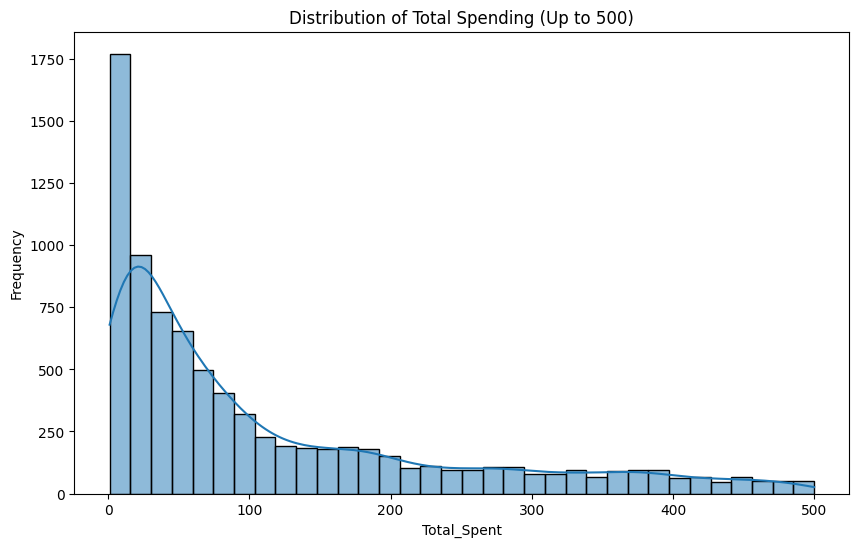

In [89]:
#Distribution of Total_Spent

plt.figure(figsize=(10, 6))
sns.histplot(df[df['Total_Spent'] <= 500]['Total_Spent'], kde=True)
plt.title('Distribution of Total Spending (Up to 500)')
plt.xlabel('Total_Spent')
plt.ylabel('Frequency')
plt.show()

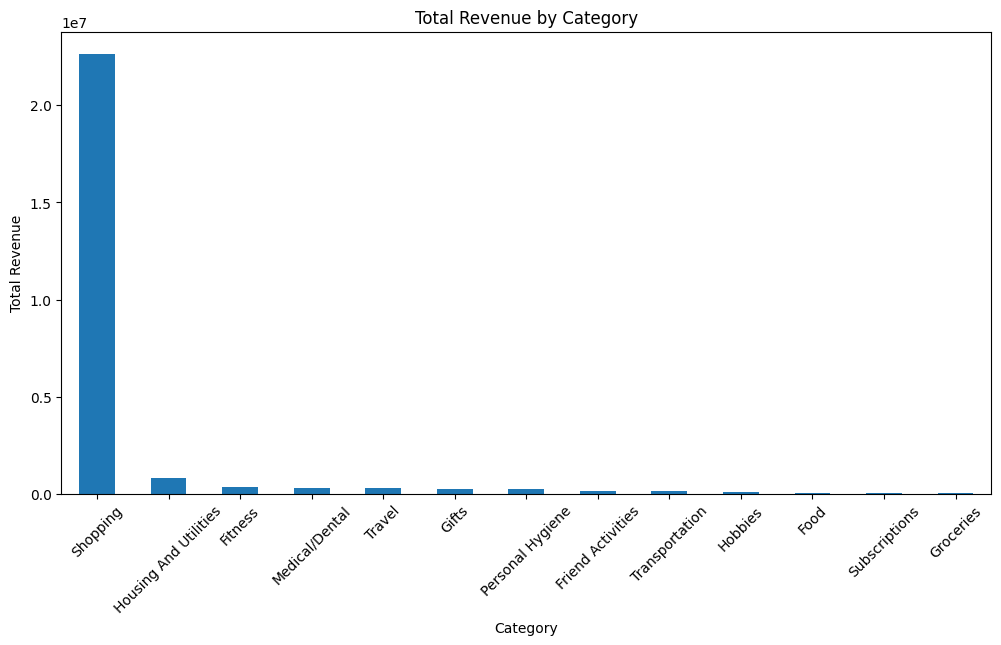

In [88]:
# Top Categories by Total Revenue
category_revenue = df.groupby('Category')['Total_Spent'].sum().sort_values(ascending=False)
plt.figure(figsize=(12, 6))
category_revenue.plot(kind='bar')
plt.title('Total Revenue by Category')
plt.xlabel('Category')
plt.ylabel('Total Revenue')
plt.xticks(rotation=45)
plt.show()

In [87]:
#Subcategory Breakdown for Shopping

shopping_items = df[df['Category'] == 'Shopping'].groupby('Item')['Total_Spent'].sum().sort_values(ascending=False)
print("Top 10 items in Shopping category:\n", shopping_items.head(10))


Top 10 items in Shopping category:
 Item
Car            22051024.82
Electronics      493672.91
Shoes             62535.03
Clothes           47291.68
Name: Total_Spent, dtype: float64


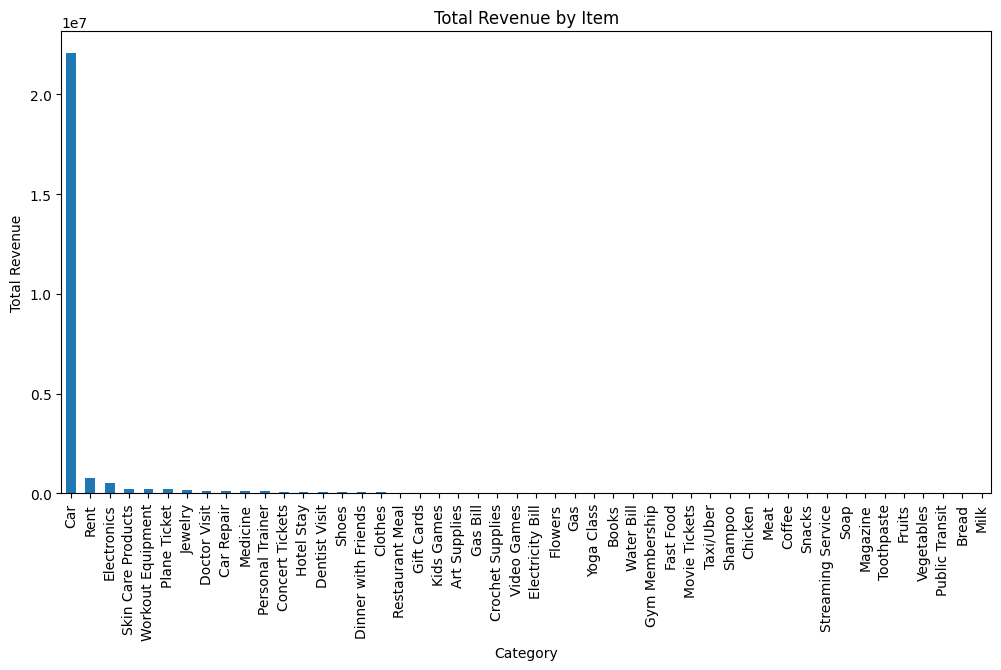

In [86]:
# Top Categories by Total Revenue
category_revenue = df.groupby('Item')['Total_Spent'].sum().sort_values(ascending=False)
plt.figure(figsize=(12, 6))
category_revenue.plot(kind='bar')
plt.title('Total Revenue by Item')
plt.xlabel('Category')
plt.ylabel('Total Revenue')
plt.xticks(rotation=90)
plt.show()

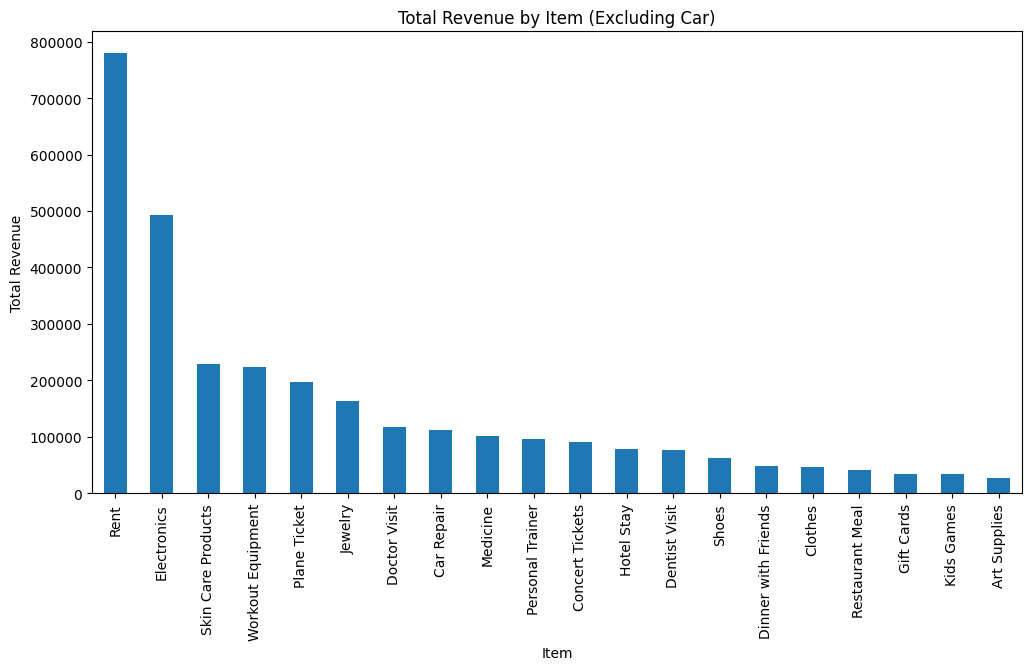

In [77]:
# Aggregate total revenue by item
item_revenue = df.groupby('Item')['Total_Spent'].sum().sort_values(ascending=False)

# Create a bar chart *excluding* "Car" sales
item_revenue_no_car = item_revenue[item_revenue.index != 'Car']

plt.figure(figsize=(12, 6))
item_revenue_no_car.head(20).plot(kind='bar')  # Show top 20 non-car items
plt.title('Total Revenue by Item (Excluding Car)')
plt.xlabel('Item')
plt.ylabel('Total Revenue')
plt.xticks(rotation=90)  # Rotate x-axis labels for readability
plt.show()

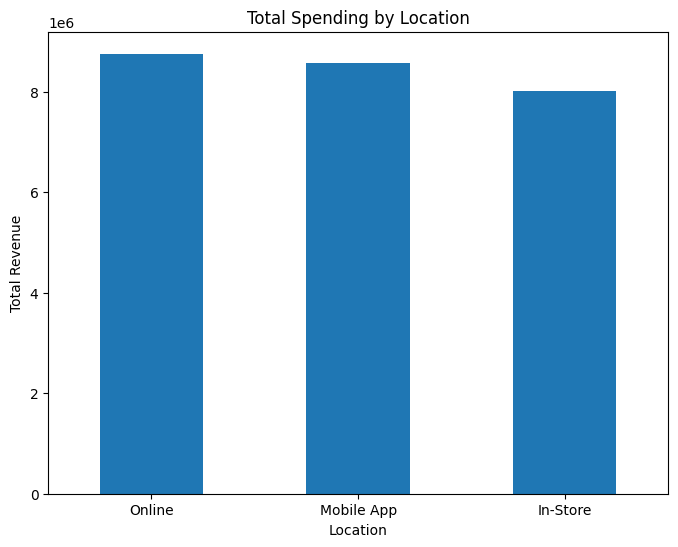

In [85]:
# Spending by Location
location_spending = df.groupby('Location')['Total_Spent'].sum().sort_values(ascending=False)
plt.figure(figsize=(8, 6))
location_spending.plot(kind='bar')
plt.title('Total Spending by Location')
plt.xlabel('Location')
plt.ylabel('Total Revenue')
plt.xticks(rotation=0)
plt.show()

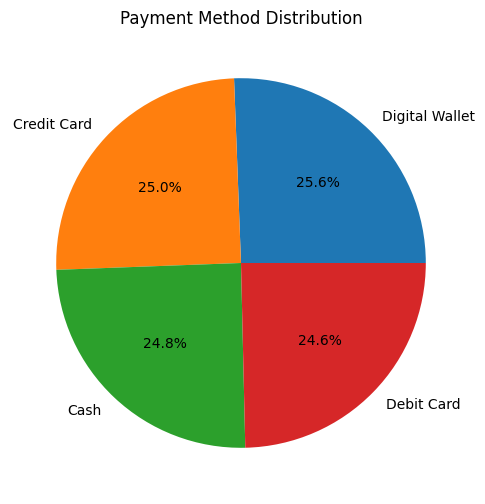

In [83]:
# Payment Method Distribution
payment_counts = df['Payment_Method'].value_counts()
plt.figure(figsize=(8, 6))
payment_counts.plot(kind='pie', autopct='%1.1f%%')
plt.title('Payment Method Distribution')
plt.ylabel('')
plt.show()

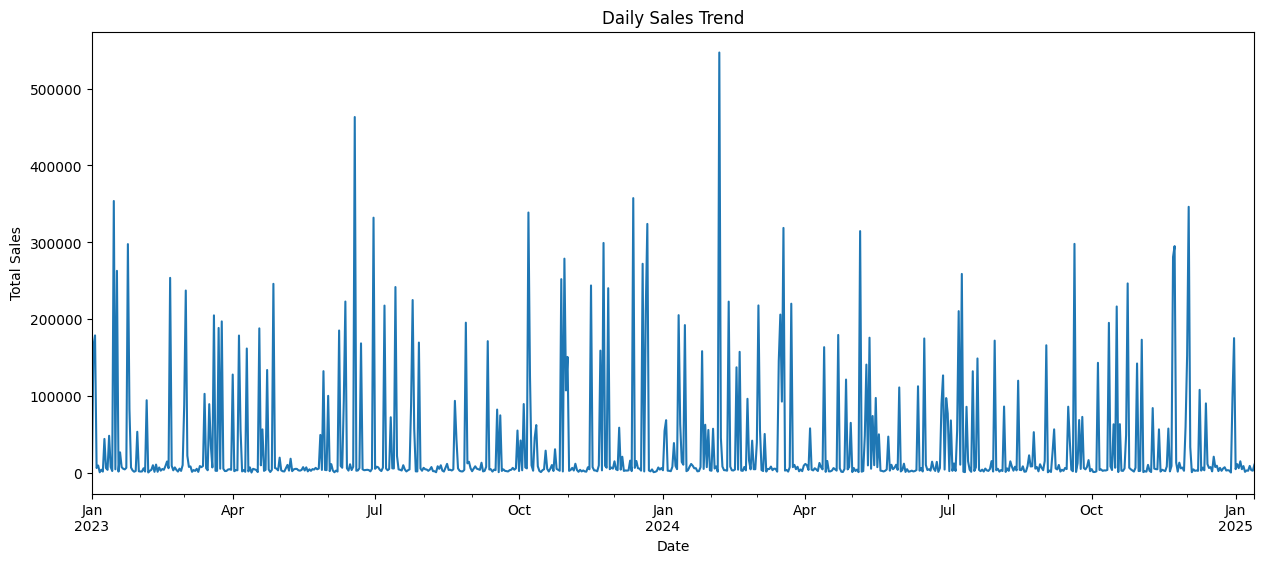

In [84]:
# Time Series Analysis (Sales Trend)
# Aggregate sales by date
daily_sales = df.groupby('Transaction_Date')['Total_Spent'].sum()
plt.figure(figsize=(15, 6))
daily_sales.plot()
plt.title('Daily Sales Trend')
plt.xlabel('Date')
plt.ylabel('Total Sales')
plt.show()